# Year 4

## Importing modules

In [1]:
#standard libs
from math import sqrt
import random
import os

#default data science libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modules for data preprocessing
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import RandomizedSearchCV

#classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier




## loading data

In [2]:
data = pd.read_excel('data/4year.xlsx')
data['B'] = (data['B'].index > 9276).astype(int)

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,B
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,0
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,0
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,0
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,0
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,0


# Data preprocessing

In [4]:
def set_new_headers(df):
    cols = ['X' + str(i+1) for i in range(len(df.columns)-1)]
    cols.append('Y')
    df.columns = cols

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputed_df = pd.DataFrame(imputer.fit_transform(data))
set_new_headers(mean_imputed_df)

data_imp = pd.DataFrame()

X = mean_imputed_df.iloc[:, :-1]
Y = mean_imputed_df.iloc[:,-1]

In [5]:
mean_imputed_df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.159290,0.46240,0.077730,1.16830,-44.8530,0.467020,0.189480,0.828950,1.12230,0.383300,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.05600,0.0
1,-0.127430,0.46243,0.269170,1.75170,7.5970,0.000925,-0.127430,1.162500,1.29440,0.537570,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.47250,0.0
2,0.070488,0.23570,0.527810,3.23930,125.6800,0.163670,0.086895,2.871800,1.05740,0.676890,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.78180,0.0
3,0.136760,0.40538,0.315430,1.87050,19.1150,0.504970,0.136760,1.453900,1.11440,0.589380,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.64840,0.0
4,-0.110080,0.69793,0.188780,1.27130,-15.3440,0.000000,-0.110080,0.432820,1.73500,0.302070,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.03600,0.0
5,0.021539,0.58425,0.086614,1.17910,-36.3940,-0.001609,0.029628,0.711610,1.43880,0.415750,...,0.219600,0.051807,0.80128,0.125080,8.7603,3.8576,122.700,2.9746,3.34820,0.0
6,0.227430,0.52266,0.444560,1.87000,-8.6787,0.000000,0.283000,0.913280,1.98110,0.477340,...,0.161100,0.476460,0.85765,0.024511,4.1654,5.2485,94.141,3.8772,44.53900,0.0
7,0.038662,0.59498,0.070504,1.11910,-37.6400,-0.529780,0.038662,0.680740,3.08610,0.405020,...,0.270590,0.095456,0.72991,0.000000,11.0850,8.4593,70.003,5.2141,9.14080,0.0
8,0.131030,0.47202,0.493500,2.13740,31.8760,0.374720,0.163780,1.118500,1.07290,0.527980,...,0.067952,0.248170,0.93205,0.072213,7.5119,4.4377,69.488,5.2527,31.39200,0.0
9,0.176980,0.19359,0.139250,3.77790,124.1000,0.338450,0.212810,4.165600,1.21280,0.806410,...,0.175470,0.219460,0.82453,0.177900,9.2352,2.4957,51.133,7.1382,0.44144,0.0


In [6]:
#Using smote to balance data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
smote = SMOTE(random_state=32)
X_train_sm, y_train_sm= smote.fit_sample(X_train, y_train)

In [7]:
#cross validation
nfolds = 10
nclass = 2
ntrain = X_train_sm.shape[0]
ntest = X_test.shape[0]


kfold = KFold(n_splits=nfolds, random_state=20, shuffle=True)
cross_val = StratifiedKFold(nfolds)

# Creating model objects
## Tuning model hyperparameters

### Logistic regression

In [8]:
log_reg = LogisticRegression()

log_reg_params = {"C": [0.5, 0.55, 0.6],
                 "solver": ['newton-cg', 'sag', 'saga']}

lr_grid = GridSearchCV(log_reg, log_reg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)

lr_grid.fit(X_train_sm, y_train_sm)
lr_best_est = lr_grid.best_estimator_

print("Accuracy (LogisticRegression): {} with params {}".format(lr_grid.best_score_, lr_best_est))


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:  1.2min finished


Accuracy (LogisticRegression): 0.7367000771010023 with params LogisticRegression(C=0.55, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


## Decision tree

In [9]:
d_tree = DecisionTreeClassifier()
d_tree_params = {'criterion': ['gini'],
                'max_depth': [50, 60, 70],
                'max_leaf_nodes': [100, 125, 150]}

dt_grid = GridSearchCV(d_tree, d_tree_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
dt_grid.fit(X_train_sm, y_train_sm)

dt_best_est = dt_grid.best_estimator_
print("Accuracy (Decision tree): {} with params {}".format(dt_grid.best_score_, dt_best_est))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   16.1s finished


Accuracy (Decision tree): 0.9117964533538936 with params DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=60,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Random forest

In [10]:
r_forest = RandomForestClassifier()
r_forest_params = {'n_estimators': [150,200],
                'criterion': ['gini'],
                'max_depth': [25, 50],
                'max_features': [64],
                'max_leaf_nodes': [10, 25],
                'bootstrap': [True]}

#r_forest_grid = GridSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#r_forest_grid.fit(X_train_sm, y_train_sm)
rf_random_grid = RandomizedSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
rf_random_grid.fit(X_train_sm, y_train_sm)

rf_best_est = rf_random_grid.best_estimator_
print("Accuracy (Random forest): {} with params {}".format(rf_random_grid.best_score_, rf_best_est))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Developement\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 15.0min finished


Accuracy (Random forest): 0.8746337702390131 with params RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## SVM

In [11]:
#
# SVM classifier в разработке
#


#svm = SVC()
#svm_params = {'kernel': ['linear', 'poly'],
#                'probability': [True],
#                'decision_function_shape': ['ovo']}

#svm_grid = GridSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_grid = RandomizedSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_best_est = svm_grid.best_estimator_
#print("Accuracy (SVM): {} with params {}".format(svm_grid.best_score_, svm_best_est))

## XGboost

In [12]:
xgboost = xgb.XGBClassifier()
xg_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [0.3, 0,5],
    'objective': ['binary:logitraw', 'binary:hinge'],
    'gamma':[0,1],
    'max_depth': [8],
    'learning_rate': [0.1, 0.15]
}

#xgb_grid = GridSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#xgb_grid.fit(X_train_sm, y_train_sm)

xgb_grid = RandomizedSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train_sm, y_train_sm)

xgb_best_est = xgb_grid.best_estimator_
print("Accuracy (XGboosting): {} with params {}".format(xgb_grid.best_score_, xgb_best_est))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


Accuracy (XGboosting): 0.9875867386276022 with params XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=5, gamma=1,
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Second level

In [13]:
def show_feature_importance(model, features):
    plt.figure(figsize=(12,8))
    results=pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results=results.sort_values('importance', ascending=False)
    print(results.head(10))
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances')
    return results

In [14]:
ntrain=X_train_sm.shape[0]
ntest = X_test.shape[0]
nclass = 2
SEED = 42
NFOLDS = 10

kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)
labels = ['Normal','Bankruptcy']

In [15]:
def BuildModel(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        clf.fit(X_train[train], y_train[train])
        sc = clf.score(X_train[test], y_train[test])
        print(i, 'accuracy', sc)
        Xr_train[test] = clf.predict_proba(X_train[test])
        Xr_test += clf.predict_proba(X_test)/NFOLDS
    
    return Xr_train, Xr_test


def BuildModel_Xgb(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        clf.fit(X_train[train], y_train[train])
        sc = clf.score(X_train[test], y_train[test])
        print(i, 'accuracy', sc)
        Xr_train[test] = clf.predict_proba(X_train[test])
        Xr_test += clf.predict_proba(X_test, validate_features=False)/NFOLDS
    
    return Xr_train, Xr_test

In [16]:
def show_accuracy(Xr, y, labels, best, nclass):
    pred=[]
    for x in Xr:
        if x > best:
            pred.append(1)
        else:
            pred.append(0)
    print(classification_report(y,pred, target_names=labels, digits=4))
    print(confusion_matrix(y, pred, labels=range(nclass)))

In [17]:
def show_auc(y_train_set, pred_train_set):
    thresholds = np.linspace(0.01, 0.5, 1000)
    f1_sc = np.array([f1_score(y_train_set, pred_train_set[:,1] > thr) for thr in thresholds])
    plt.figure(figsize=(12,8))
    plt.plot(thresholds, f1_sc, linewidth=4)
    plt.ylabel("F1 score", fontsize=18)
    plt.xlabel("Threshold", fontsize=18)
    
    best_model_f1 = thresholds[f1_sc.argmax()]
    
    return best_model_f1

## Logistic regression

In [18]:
lr_best = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
pred_train, pred_test=BuildModel(lr_best, X_train_sm, y_train_sm, X_test,kf, ntrain, ntest, nclass, NFOLDS)

C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0 accuracy 0.725520431765613


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


1 accuracy 0.7093292212798766


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


2 accuracy 0.7432536622976099


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


3 accuracy 0.7386276021588281


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


4 accuracy 0.7262914417887433


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


5 accuracy 0.7116422513492675


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


6 accuracy 0.7455666923670008


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


7 accuracy 0.7262914417887433


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


8 accuracy 0.7440246723207402
9 accuracy 0.7602158828064765


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.7509637625289127
0.45545454545454545


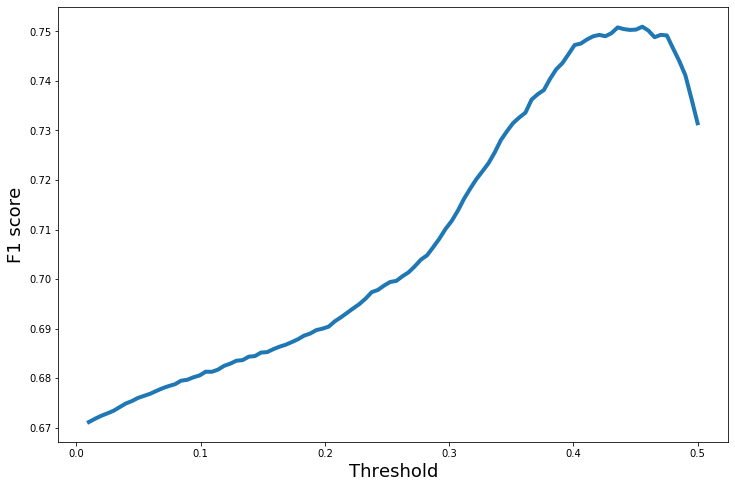

In [19]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc = np.array([f1_score(y_train_sm,pred_train[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
#plt.savefig("Xgb-thr.jpg", dpi=300)
best_lr = thresholds[f1_sc.argmax()]
print(f1_sc.max())
print(best_lr)

In [20]:
show_accuracy(pred_train[:,1],y_train_sm, labels, best_lr, nclass)

              precision    recall  f1-score   support

      Normal     0.7826    0.6261    0.6956      6485
  Bankruptcy     0.6884    0.8261    0.7510      6485

    accuracy                         0.7261     12970
   macro avg     0.7355    0.7261    0.7233     12970
weighted avg     0.7355    0.7261    0.7233     12970

[[4060 2425]
 [1128 5357]]


## Decision tree

In [21]:
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
pred_train_dt, pred_test_dt=BuildModel(dt_best, X_train_sm, y_train_sm, X_test,kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.9090208172706246
1 accuracy 0.9067077872012336
2 accuracy 0.9151888974556669
3 accuracy 0.9059367771781033
4 accuracy 0.9121048573631457
5 accuracy 0.9067077872012336
6 accuracy 0.9113338473400154
7 accuracy 0.9198149575944488
8 accuracy 0.9144178874325366
9 accuracy 0.912875867386276


0.9135114791117802
0.2822222222222222


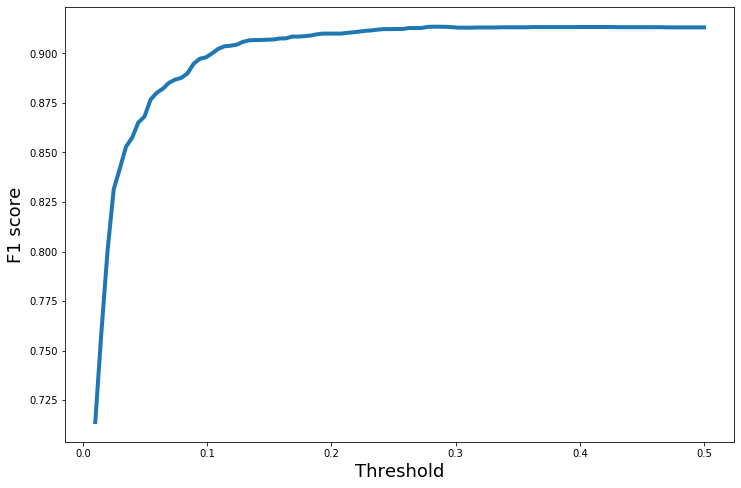

In [22]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_dt = np.array([f1_score(y_train_sm,pred_train_dt[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_dt, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
#plt.savefig("Xgb-thr.jpg", dpi=300)
best_dt_f1 = thresholds[f1_sc_dt.argmax()]
print(f1_sc_dt.max())
print(best_dt_f1)

In [23]:
show_accuracy(pred_train_dt[:,1],y_train_sm, labels, best_dt_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9324    0.8871    0.9092      6485
  Bankruptcy     0.8924    0.9357    0.9135      6485

    accuracy                         0.9114     12970
   macro avg     0.9124    0.9114    0.9114     12970
weighted avg     0.9124    0.9114    0.9114     12970

[[5753  732]
 [ 417 6068]]


## Random forest

In [24]:
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

pred_train_rf, pred_test_rf = BuildModel(rf_best, X_train_sm, y_train_sm, X_test,kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.8681572860447185
1 accuracy 0.8689282960678488
2 accuracy 0.8858905165767155
3 accuracy 0.8797224363916731
4 accuracy 0.8635312259059368
5 accuracy 0.8851195065535852
6 accuracy 0.8635312259059368
7 accuracy 0.8789514263685428
8 accuracy 0.882035466461064
9 accuracy 0.8804934464148034


f1 score of random forest:  0.8824901589152937
0.41585858585858587


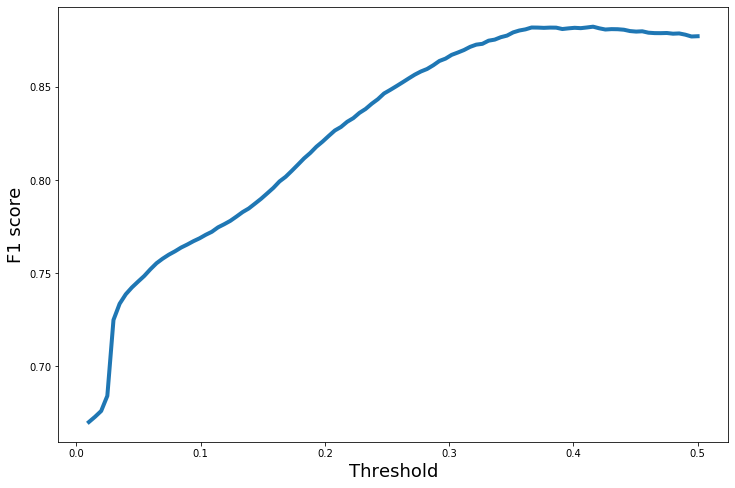

In [25]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_rf = np.array([f1_score(y_train_sm,pred_train_rf[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_rf, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_rf_f1 = thresholds[f1_sc_rf.argmax()]
print('f1 score of random forest: ', f1_sc_rf.max())
print(best_rf_f1)

In [26]:
show_accuracy(pred_train_rf[:,1],y_train_sm, labels, best_rf_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9247    0.8180    0.8681      6485
  Bankruptcy     0.8369    0.9334    0.8825      6485

    accuracy                         0.8757     12970
   macro avg     0.8808    0.8757    0.8753     12970
weighted avg     0.8808    0.8757    0.8753     12970

[[5305 1180]
 [ 432 6053]]


## Xgboost

In [27]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

pred_train_xgb, pred_test_xgb = BuildModel_Xgb(xgb_best, X_train_sm, y_train_sm, X_test, kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.9892058596761758
1 accuracy 0.9845797995373939
2 accuracy 0.9892058596761758
3 accuracy 0.992289899768697
4 accuracy 0.9899768696993061
5 accuracy 0.9868928296067849
6 accuracy 0.9853508095605242
7 accuracy 0.9838087895142636
8 accuracy 0.9892058596761758
9 accuracy 0.9861218195836546


0.9876790389650393


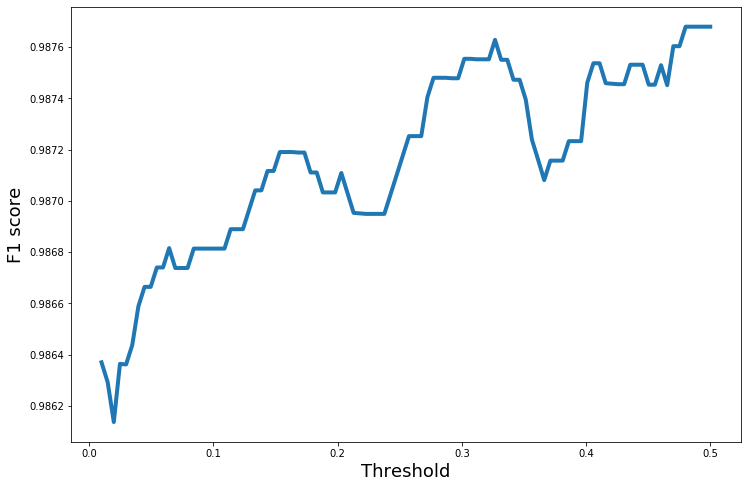

In [28]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_xgb = np.array([f1_score(y_train_sm,pred_train_xgb[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_xgb, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_xgb = thresholds[f1_sc_xgb.argmax()]
print(f1_sc_xgb.max())

In [29]:
show_accuracy(pred_train_xgb[:,1],y_train_sm, labels, best_thr_xgb, nclass)

              precision    recall  f1-score   support

      Normal     0.9889    0.9864    0.9876      6485
  Bankruptcy     0.9865    0.9889    0.9877      6485

    accuracy                         0.9877     12970
   macro avg     0.9877    0.9877    0.9877     12970
weighted avg     0.9877    0.9877    0.9877     12970

[[6397   88]
 [  72 6413]]
